# Read file

In [4]:
# ! pip install xarray
# ! pip install netcdf4
# ! pip install ipyvolume
# ! pip install ipython_genutils
# ! pip install open3d 
# ! pip install pyvista[all]
# ! pip install trame

In [58]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

wrf_file = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire\inference_2023-06-01 01-00-00p00-00.nc"
wrf=xr.open_dataset(wrf_file)
wrf

<xarray.Dataset>
Dimensions:                (y: 353, x: 333)
Coordinates:
  * y                      (y) float64 1.404e+06 1.401e+06 ... 3.581e+05
  * x                      (x) float64 1.269e+06 1.272e+06 ... 2.256e+06
    spatial_ref            int32 ...
Data variables:
    MASSDEN                (y, x) float64 ...
    PM2_5_DRY_SFC          (y, x) float64 ...
    prediction             (y, x) float64 ...
    stations               (y, x) float64 ...
    stations_interpolated  (y, x) float64 ...
    fused_data             (y, x) float64 ...

In [59]:
wrt_var_name = 'fused_data'
wrf_var = wrf[wrt_var_name]
wrf_var

<xarray.DataArray 'fused_data' (y: 353, x: 333)>
[117549 values with dtype=float64]
Coordinates:
  * y            (y) float64 1.404e+06 1.401e+06 ... 3.611e+05 3.581e+05
  * x            (x) float64 1.269e+06 1.272e+06 ... 2.253e+06 2.256e+06
    spatial_ref  int32 ...

In [60]:
wrf

<xarray.Dataset>
Dimensions:                (y: 353, x: 333)
Coordinates:
  * y                      (y) float64 1.404e+06 1.401e+06 ... 3.581e+05
  * x                      (x) float64 1.269e+06 1.272e+06 ... 2.256e+06
    spatial_ref            int32 ...
Data variables:
    MASSDEN                (y, x) float64 ...
    PM2_5_DRY_SFC          (y, x) float64 ...
    prediction             (y, x) float64 ...
    stations               (y, x) float64 ...
    stations_interpolated  (y, x) float64 ...
    fused_data             (y, x) float64 ...

used fused_data 

stations_interpolated: ground obs.: IDW

stations: actual obs.

PM2_5_DRY_SFC: WRF_chem

prediction: Random forest


In [61]:
wrf.x.shape, wrf.y.shape, wrf.fused_data.shape

((333,), (353,), (353, 333))

In [62]:
state_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_state_20m.zip')
state_gdf = state_gdf.to_crs("ESRI:102003")


In [63]:
wrf.attrs

{}

In [64]:
wrf_var.values.shape
# wrf_var.time.values
# wrf_var.bottom_top.values
# wrf_var.XLONG.values
wrf_var.values

array([[12.11366177, 14.79765034, 14.96959686, ..., 14.13338852,
        14.62458038, 11.1955843 ],
       [13.68688869, 15.25506687, 15.3961792 , ..., 13.86375046,
        15.45874596, 13.82852554],
       [14.12922573, 14.92307472, 15.25976753, ..., 13.22831249,
        14.6400032 , 13.66881561],
       ...,
       [11.9819603 , 12.75313568, 13.14771938, ..., 17.90988731,
        17.88424492, 16.19779968],
       [11.9644556 , 13.41115189, 13.51234913, ..., 18.44371605,
        18.12957573, 15.7432909 ],
       [10.48697567, 11.64456558, 11.64511395, ..., 15.64493847,
        15.20453548, 11.96986771]])

In [65]:
wrf['x']#.shape

<xarray.DataArray 'x' (x: 333)>
array([1269255.197404, 1272226.321865, 1275197.446327, ..., 2249726.269626,
       2252697.394087, 2255668.518548])
Coordinates:
  * x            (x) float64 1.269e+06 1.272e+06 ... 2.253e+06 2.256e+06
    spatial_ref  int32 ...

In [66]:
# wrf['x'].values
wrf_var.values.shape
# wrf['y'].values.shape
wrf_var['y'].values.shape

(353,)

<Axes: >

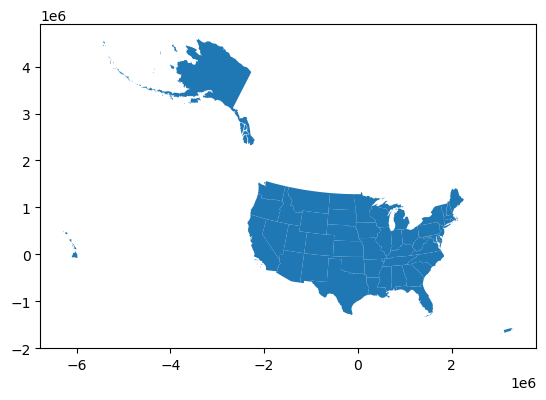

In [67]:
state_gdf.to_crs("ESRI:102003").plot()

<Axes: >

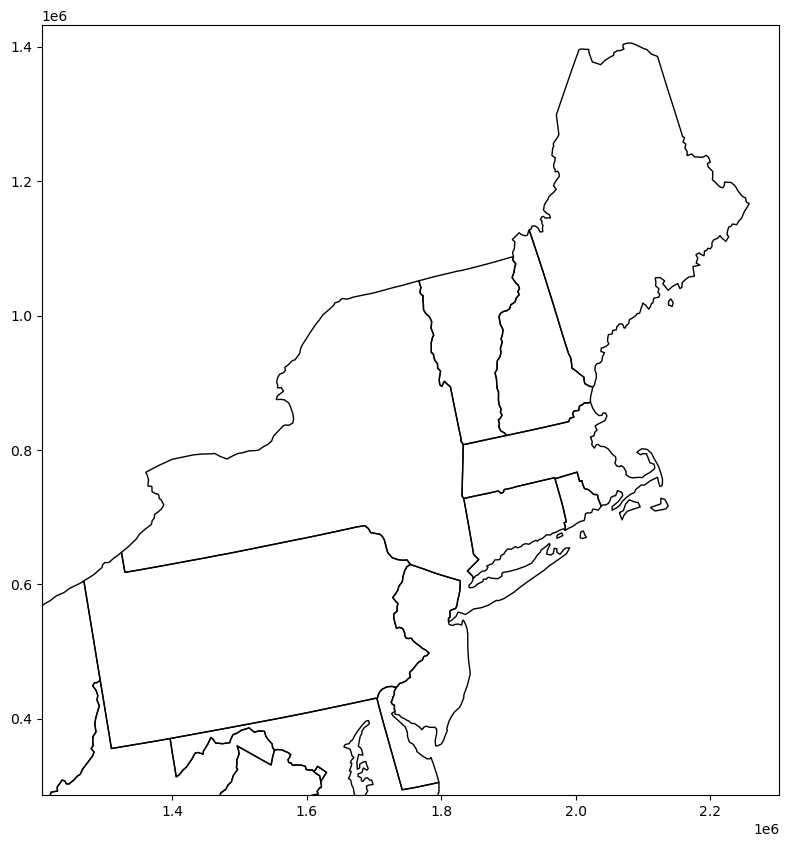

In [68]:
fig, ax = plt.subplots(figsize=(15, 10))#

# wrf_var.isel(time=0).plot()  # , c=wrf_var.values, cmap='viridis'
# ax.scatter(wrf['x'].values, wrf['y'].values, s=0.05, c=wrf_var.values)

x_min_lim = wrf['x'].values.min() * 0.95
x_max_lim = wrf['x'].values.max() * 1.021

y_min_lim = wrf['y'].values.min() * 0.8
y_max_lim = wrf['y'].values.max() * 1.02

ax.set_xlim((x_min_lim, x_max_lim))
ax.set_ylim((y_min_lim, y_max_lim))

state_gdf.plot(ax=ax, facecolor="none")

State: Pennsylvania, New York, New Jersey, Rhode Island, Maine, Connecticut, Vermont, New Hampshire, Delaware, Massachusetts 


# 3D show

In [29]:
# Import necessary libraries
import xarray as xr
import ipyvolume as ipv
import numpy as np
import matplotlib.cm as cm

# Load the NetCDF data
data_path = wrf_file
dataset = xr.open_dataset(data_path)

# Let's say the variable you want to visualize is  wrt_var_name
# Replace 'temperature' with your desired variable name
data_var = wrt_var_name
data_array = dataset[data_var][0]

# Extract 3D data; adjust indices as per your data dimensions.
# This assumes the data is in the form (time, latitude, longitude), adjust if necessary
data_3d = data_array[:, :, :]

# Convert data array to numpy for visualization
data_values = data_3d.values

# Let's normalize the data for coloring
norm = (data_values - np.nanmin(data_values)) / (np.nanmax(data_values) - np.nanmin(data_values))

# Convert normalized data to colormap
colors = cm.viridis(norm)

# Create a 3D plot
ipv.figure()
ipv.volshow(data_values, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1, lighting=True)

# Display
ipv.show()


Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.25, max=1.0, ste…

In [30]:
layer_cnt = 42

val_cnt = len(dataset['XLAT'].values.flatten())

x = np.tile( dataset['XLAT'].values.flatten(), layer_cnt)
y = np.tile( dataset['XLONG'].values.flatten(), layer_cnt)
z = [[i] * val_cnt for i in range(layer_cnt)]
z = np.array(z).flatten()



values = dataset[wrt_var_name].values.flatten()

# dataset[wrt_var_name].values.flatten()

# Step 2: Convert the data into a point cloud format for Open3D
points = np.column_stack([x, y, z])


# Pyvista

In [13]:
import pyvista as pv

pv.set_plot_theme("document")
plotter = pv.Plotter(notebook=False)  # this will force pyvista to use an external viewer


In [14]:
import pyvista as pv
import numpy as np
from netCDF4 import Dataset


# Load the netCDF data
# nc_file = "path_to_your_netCDF_file.nc"
# data = Dataset(nc_file, "r")

# # Assuming the data has variables 'longitude', 'latitude', and 'temperature' for this example
# lons = data.variables['longitude'][:]
# lats = data.variables['latitude'][:]
# temperature = data.variables['temperature'][:]  # Adjust this based on your variable of interest

# # Create a grid of the data
# x, y = np.meshgrid(lons, lats)
# # Here we're assuming the data is 2D. If it's 3D, you'll also have a depth or time dimension to consider

# Convert the data to a PyVista structured grid
grid = pv.StructuredGrid(x, y, z)
grid[wrt_var_name] = values  # or whatever variable you're interested in

# Plot the data


In [ ]:
point_cloud = pv.PolyData(points)
point_cloud

In [20]:
p = pv.Plotter()
p.add_mesh(grid, scalars=wrt_var_name, cmap="viridis")  # adjust colormap as desired
p.show()

Widget(value="<iframe src='http://localhost:53007/index.html?ui=P_0x252bd9197b0_2&reconnect=auto' style='width…

 JS Error => ReferenceError: P_0x252bd9197b0_2_show_ui is not defined


In [22]:
import pyvista as pv
from pyvista import examples

dataset = examples.download_lucy()
dataset.plot(smooth_shading=True, color='white')

Widget(value="<iframe src='http://localhost:53007/index.html?ui=P_0x252aebd8490_4&reconnect=auto' style='width…

 JS Error => ReferenceError: P_0x252aebd8490_4_show_ui is not defined


In [ ]:

val_cnt

In [ ]:
dataset['bottom_top'].values

In [ ]:
z = [[i] * val_cnt for i in range(42)]
z = np.array(z).flatten()
# len(np.array(z).flatten())

In [ ]:
len(z[41])

In [25]:
import open3d as o3d
import numpy as np
import netCDF4

# Step 1: Read the data from the netCDF file
 
data_array = dataset[data_var][0]

# Assuming your dataset contains variables 'x', 'y', and 'z' for point coordinates

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# Step 3: Visualize the point cloud using Open3D
# o3d.visualization.draw_geometries([pcd])
o3d.visualization.draw_geometries([pcd], point_show_normal=False)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


KeyError: 'Data array (PM2_5_DRY) not present in this dataset.'

In [ ]:
o3d.visualization.draw_geometries([pcd], point_show_normal=True)


In [24]:
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(pcd)

# Control the point size here
render_option = vis.get_render_option()
render_option.point_size = 1.0

vis.run()
vis.destroy_window()

NameError: name 'o3d' is not defined

In [ ]:
len(  dataset['XLAT'].values.flatten() * layer_cnt)

In [ ]:
data_array.values.shape

In [ ]:
229 *  389

In [ ]:
np.array([1, 3]) * 3

In [33]:
from __future__ import print_function
# import wrf
from netCDF4 import Dataset
# from wrf import getvar

ncfile = Dataset(r"I:\Research_Data\Wild_fire\WRF_Chem\202306\wrfout_hourly_d01_2023-06-01_20_00_00.nc")
ncfile.variables.keys() 

dict_keys(['Times', 'time', 'bottom_top', 'bottom_top_stag', 'XLAT', 'XLAT_U', 'XLAT_V', 'XLONG', 'XLONG_U', 'XLONG_V', 'ACET_SFC', 'ALD_SFC', 'AOD_300', 'AOD_400', 'AOD_550', 'AOD_600', 'AOD_999', 'BC1_SFC', 'BC2_SFC', 'BIGALK_SFC', 'BIGENE_SFC', 'BSCOEF1', 'BSCOEF2', 'BSCOEF3', 'BSCOEF4', 'C2H4_SFC', 'C2H6_SFC', 'C3H6_SFC', 'C3H8_SFC', 'CFRACT', 'CH3CHO_SFC', 'CH3OH_SFC', 'CH4_SFC', 'CLDFRA', 'CO_SFC', 'DUST_1_SFC', 'DUST_2_SFC', 'DUST_3_SFC', 'DUST_4_SFC', 'DUST_5_SFC', 'EXTAER1', 'EXTAER2', 'EXTAER3', 'EXTAER4', 'EXTCOF55', 'E_NO', 'E_NO2', 'HCHO_SFC', 'HGT', 'HO2_SFC', 'HO_SFC', 'ISOPR_SFC', 'LU_INDEX', 'LU_MASK', 'NO2_SFC', 'NO_SFC', 'O3_SFC', 'OC1_SFC', 'OC2_SFC', 'P', 'PAN_SFC', 'PB', 'PBLH', 'PH', 'PHB', 'PHOTR2', 'PHOTR3', 'PM10', 'PM10_SFC', 'PM2_5_DRY', 'PM2_5_DRY_SFC', 'PSFC', 'Q2', 'QCLOUD', 'QVAPOR', 'SEAS_1_SFC', 'SEAS_2_SFC', 'SEAS_3_SFC', 'SEAS_4_SFC', 'SO2_SFC', 'SSA_300', 'SSA_400', 'SSA_600', 'SSA_999', 'SWDOWN', 'T', 'T2', 'TOL_SFC', 'U', 'U10', 'V', 'V10', 'W', '

In [ ]:
# # Get the Sea Level Pressure
# var = getvar(wrfin=ncfile, varname='PM2_5_DRY', timeidx=wrf.ALL_TIMES)  # , timeidx=wrf.ALL_TIMES

# print(var.shape)

In [27]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

# Open the NetCDF file
# ncfile = Dataset("wrfout_d01_2016-10-07_00_00_00")

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Sea Level Pressure (hPa)")

plt.show()

ModuleNotFoundError: No module named 'cartopy'

In [ ]:
from_dir = r'J:\.shortcut-targets-by-id\1S6nHwRuOqclFdfugsdsPS7hjeGFWOo1L\paper - Canadian wildfire\WRF_Chem\202307'
to_dir = r'I:\Research_Data\Wild_fire\WRF_Chem\202307'

In [ ]:
files = glob(os.path.join(from_dir, "*.nc"))
files

In [ ]:
# while true:
file = files.pop()
file

In [ ]:

size_in_bytes = os.path.getsize(file )
if size_in_bytes == 764099472:
    basename = os.path.basename(file)
    new_name = os.path.join(to_dir, basename)
    shutil.move(file, new_name)


In [ ]:
from __future__ import print_function

from wrf import omp_enabled

print(omp_enabled())

from wrf import omp_get_num_procs

print(omp_get_num_procs())

In [ ]:
# ! pip install xarray
import xarray as xr
import xarray as xr
!pip install xarray --upgrade


In [ ]:
import geopandas as gpd

In [ ]:

state_gdf

In [ ]:
gdf.explore()